In [36]:
# !pip install seaborn
# !pip install umap
# !pip install kagglehub

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/konradbaranek/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [2]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)   

In [3]:
input_path = path
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [4]:
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

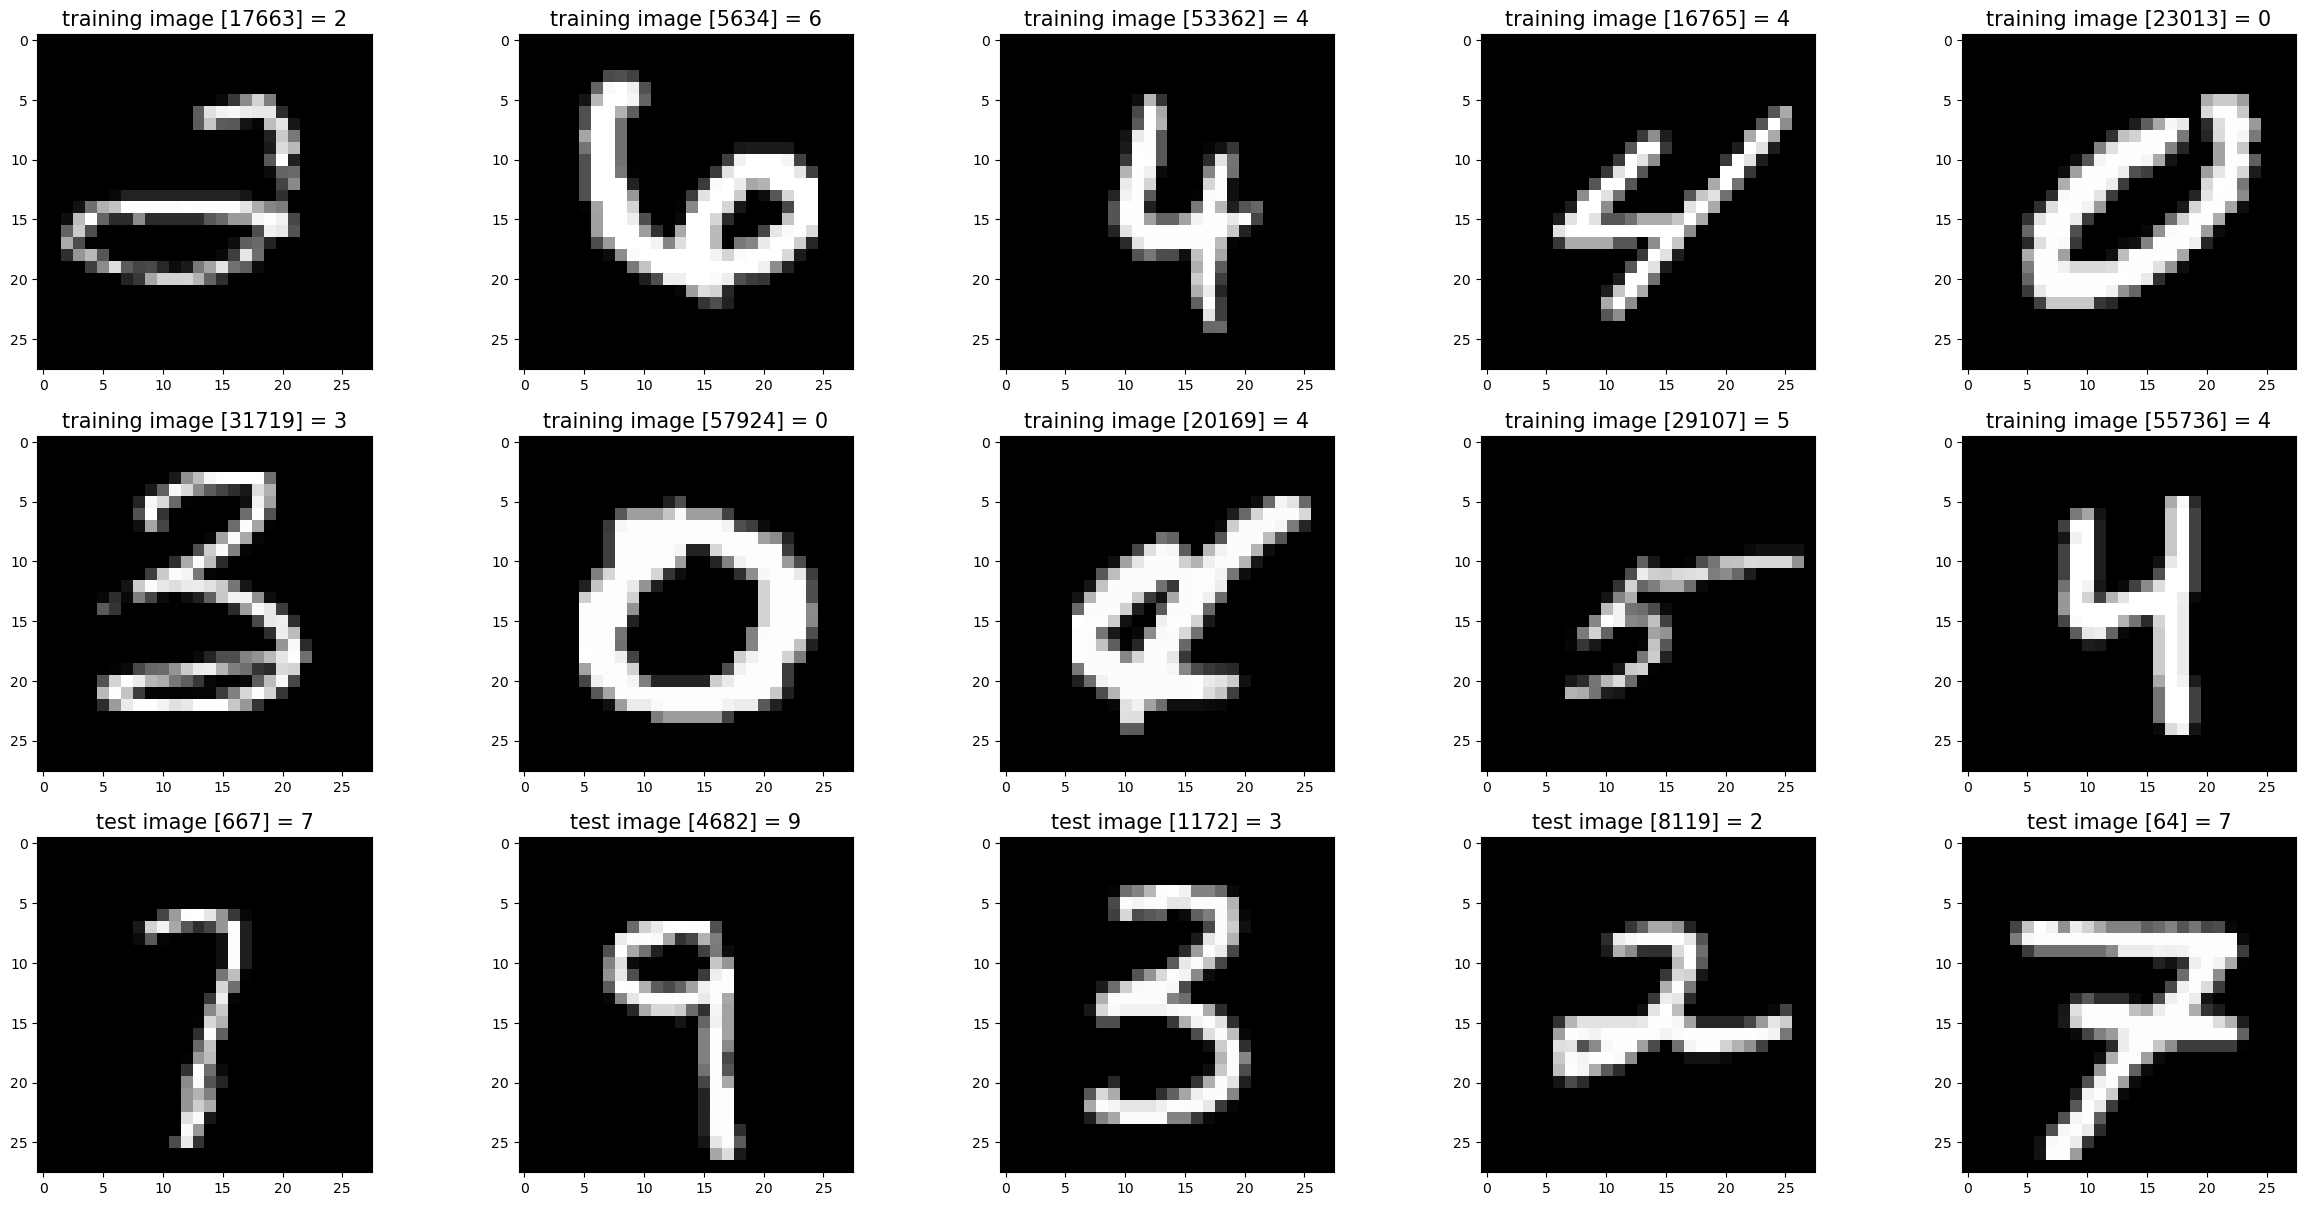

In [5]:


#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_digits, make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from umap.umap_ import UMAP, ISOMAP
#from tensorflow.keras.datasets import mnist, fashion_mnist



# 1. IRIS
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)


# 2. Digits
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)


# 3. Swiss Roll
X_swiss, t_swiss = make_swiss_roll(n_samples=2000, noise=0.1, random_state=42)


In [48]:
from sklearn.manifold import LocallyLinearEmbedding, Isomap
def plot_embedding(X, y, title, n_components=2):
    X_embedded_PCA = PCA(n_components=n_components).fit_transform(X)
    X_embedded_UMAP = UMAP(n_components=n_components).fit_transform(X)
    X_embedded_LLE = LocallyLinearEmbedding(n_components=n_components, n_neighbors=10).fit_transform(X)
    X_embedded_ISOMAP = Isomap(n_components=n_components, n_neighbors=10).fit_transform(X)
    perplexities = [5, 10, 30, 50]
    tsne_embeddings = []
    for perp in perplexities:
        tsne = TSNE(n_components=n_components, perplexity=perp, random_state=42)
        X_embedded_tsne = tsne.fit_transform(X)
        tsne_embeddings.append(X_embedded_tsne)
           
    fig = plt.figure(figsize=(16, 16))
    ax1 = plt.subplot(3, 3, 1)
    scatter1 = ax1.scatter(X_embedded_PCA[:, 0], X_embedded_PCA[:, 1], 
               c=y, cmap='viridis', s=30, alpha=0.8)
    ax1.set_title('PCA')
    ax1.legend(*scatter1.legend_elements(), loc="lower left", title="target")
    
    ax2 = plt.subplot(3, 3, 2)
    ax2.scatter(X_embedded_UMAP[:, 0], X_embedded_UMAP[:, 1], 
               c=y, cmap='viridis', s=30, alpha=0.8)
    ax2.set_title('UMAP')
    
    
  
    for i, (perp, embedding) in enumerate(zip(perplexities, tsne_embeddings)):
        if i < 3:
            ax = plt.subplot(3, 3, i + 4)  # 4, 5, 6
            ax.scatter(embedding[:, 0], embedding[:, 1], 
                     c=y, cmap='viridis', s=30, alpha=0.8)
            ax.set_title(f't-SNE (perplexity={perp})')
    
    ax3 = plt.subplot(3, 3, 3)
    ax3.scatter(X_embedded_LLE[:, 0], X_embedded_LLE[:, 1], 
               c=y, cmap='viridis', s=30, alpha=0.8)
    ax3.set_title('LLE')
    ax4 = plt.subplot(3, 3, 8)
    ax4.scatter(X_embedded_ISOMAP[:, 0], X_embedded_ISOMAP[:, 1], 
               c=y, cmap='viridis', s=30, alpha=0.8)
    ax4.set_title('ISOMAP')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

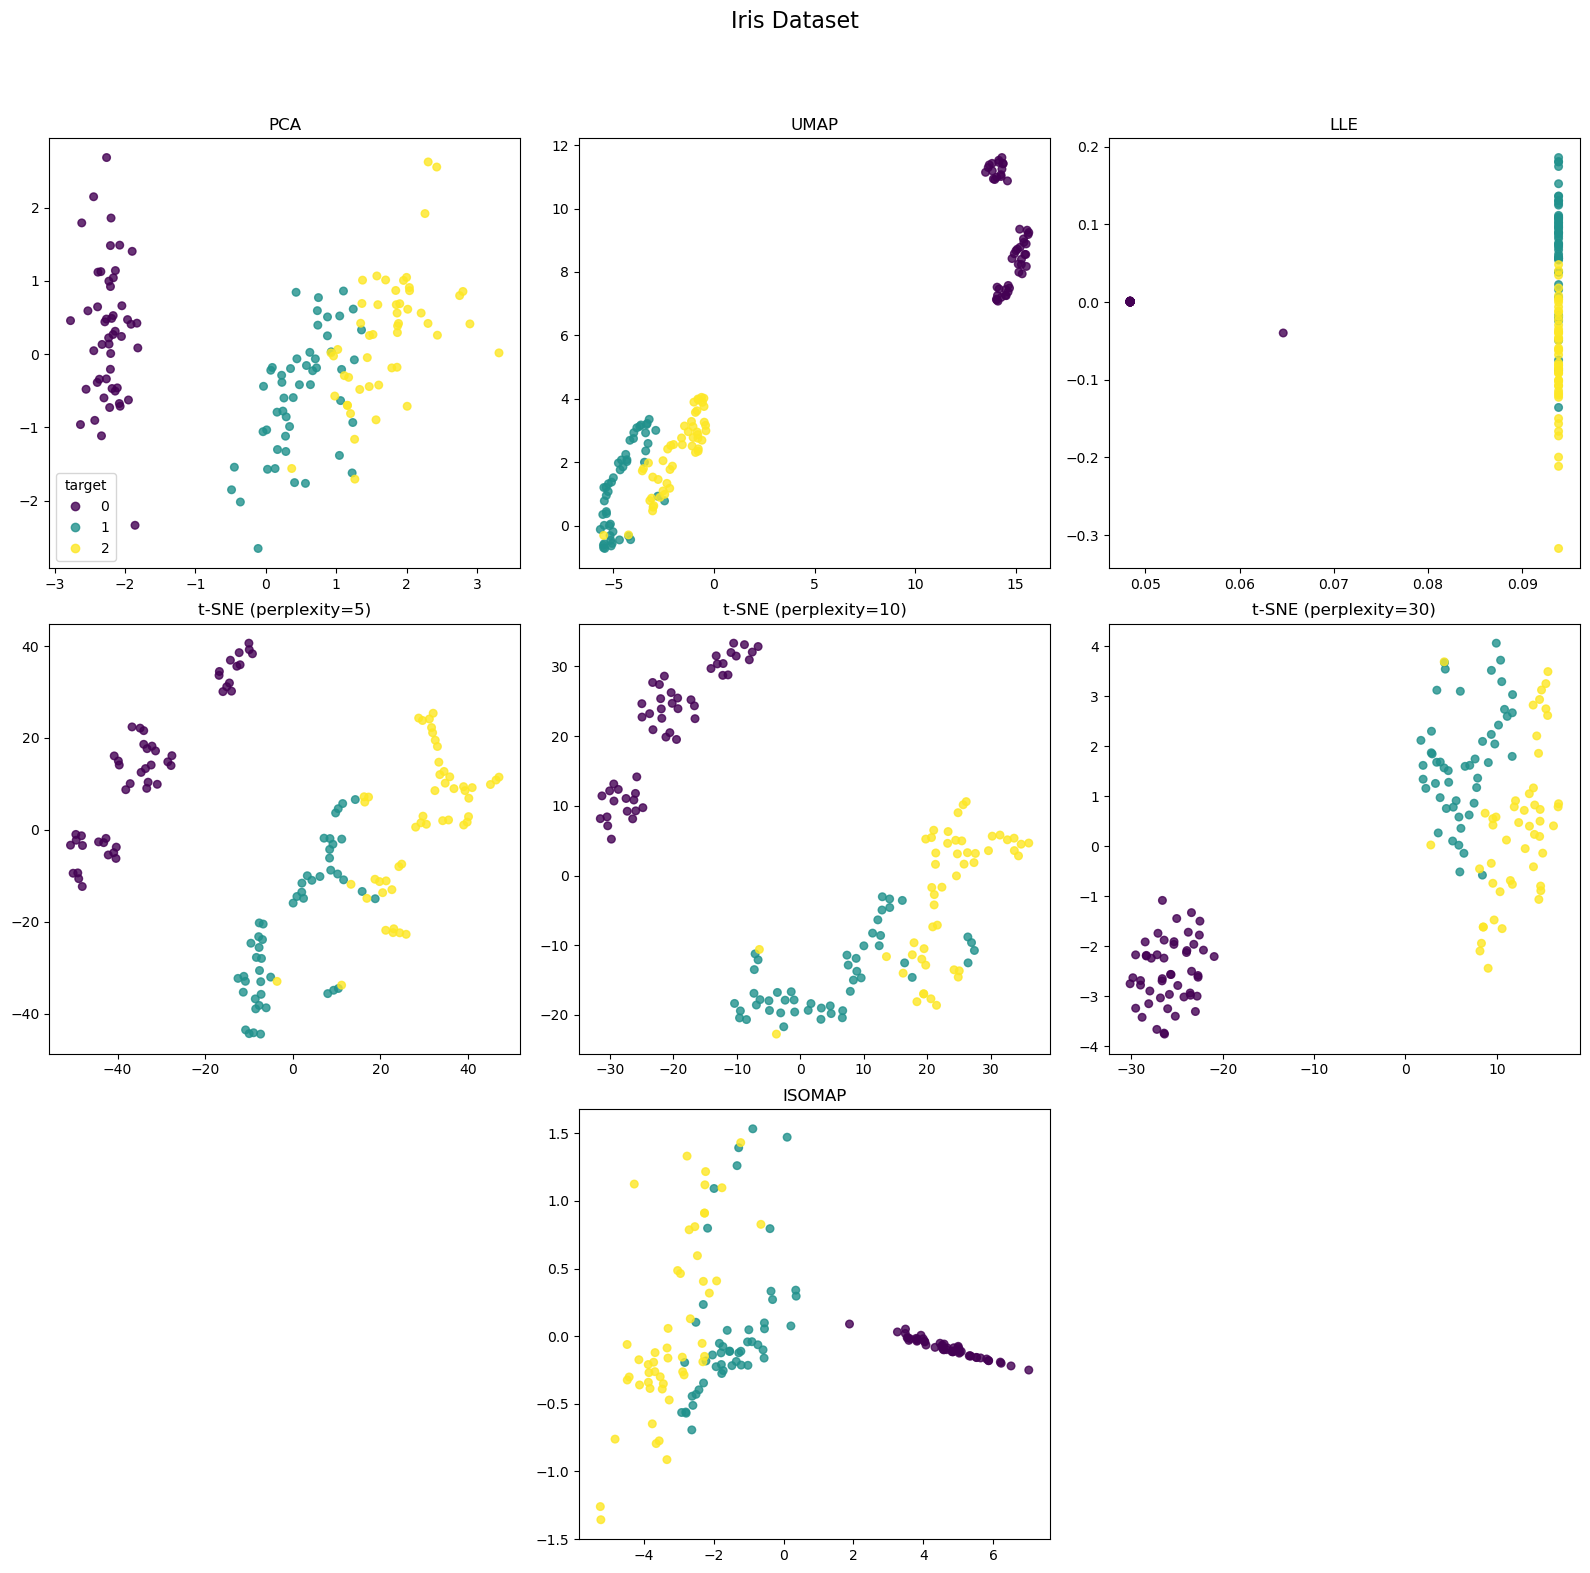

In [49]:
plot_embedding(X_iris,iris.target, 'Iris Dataset')

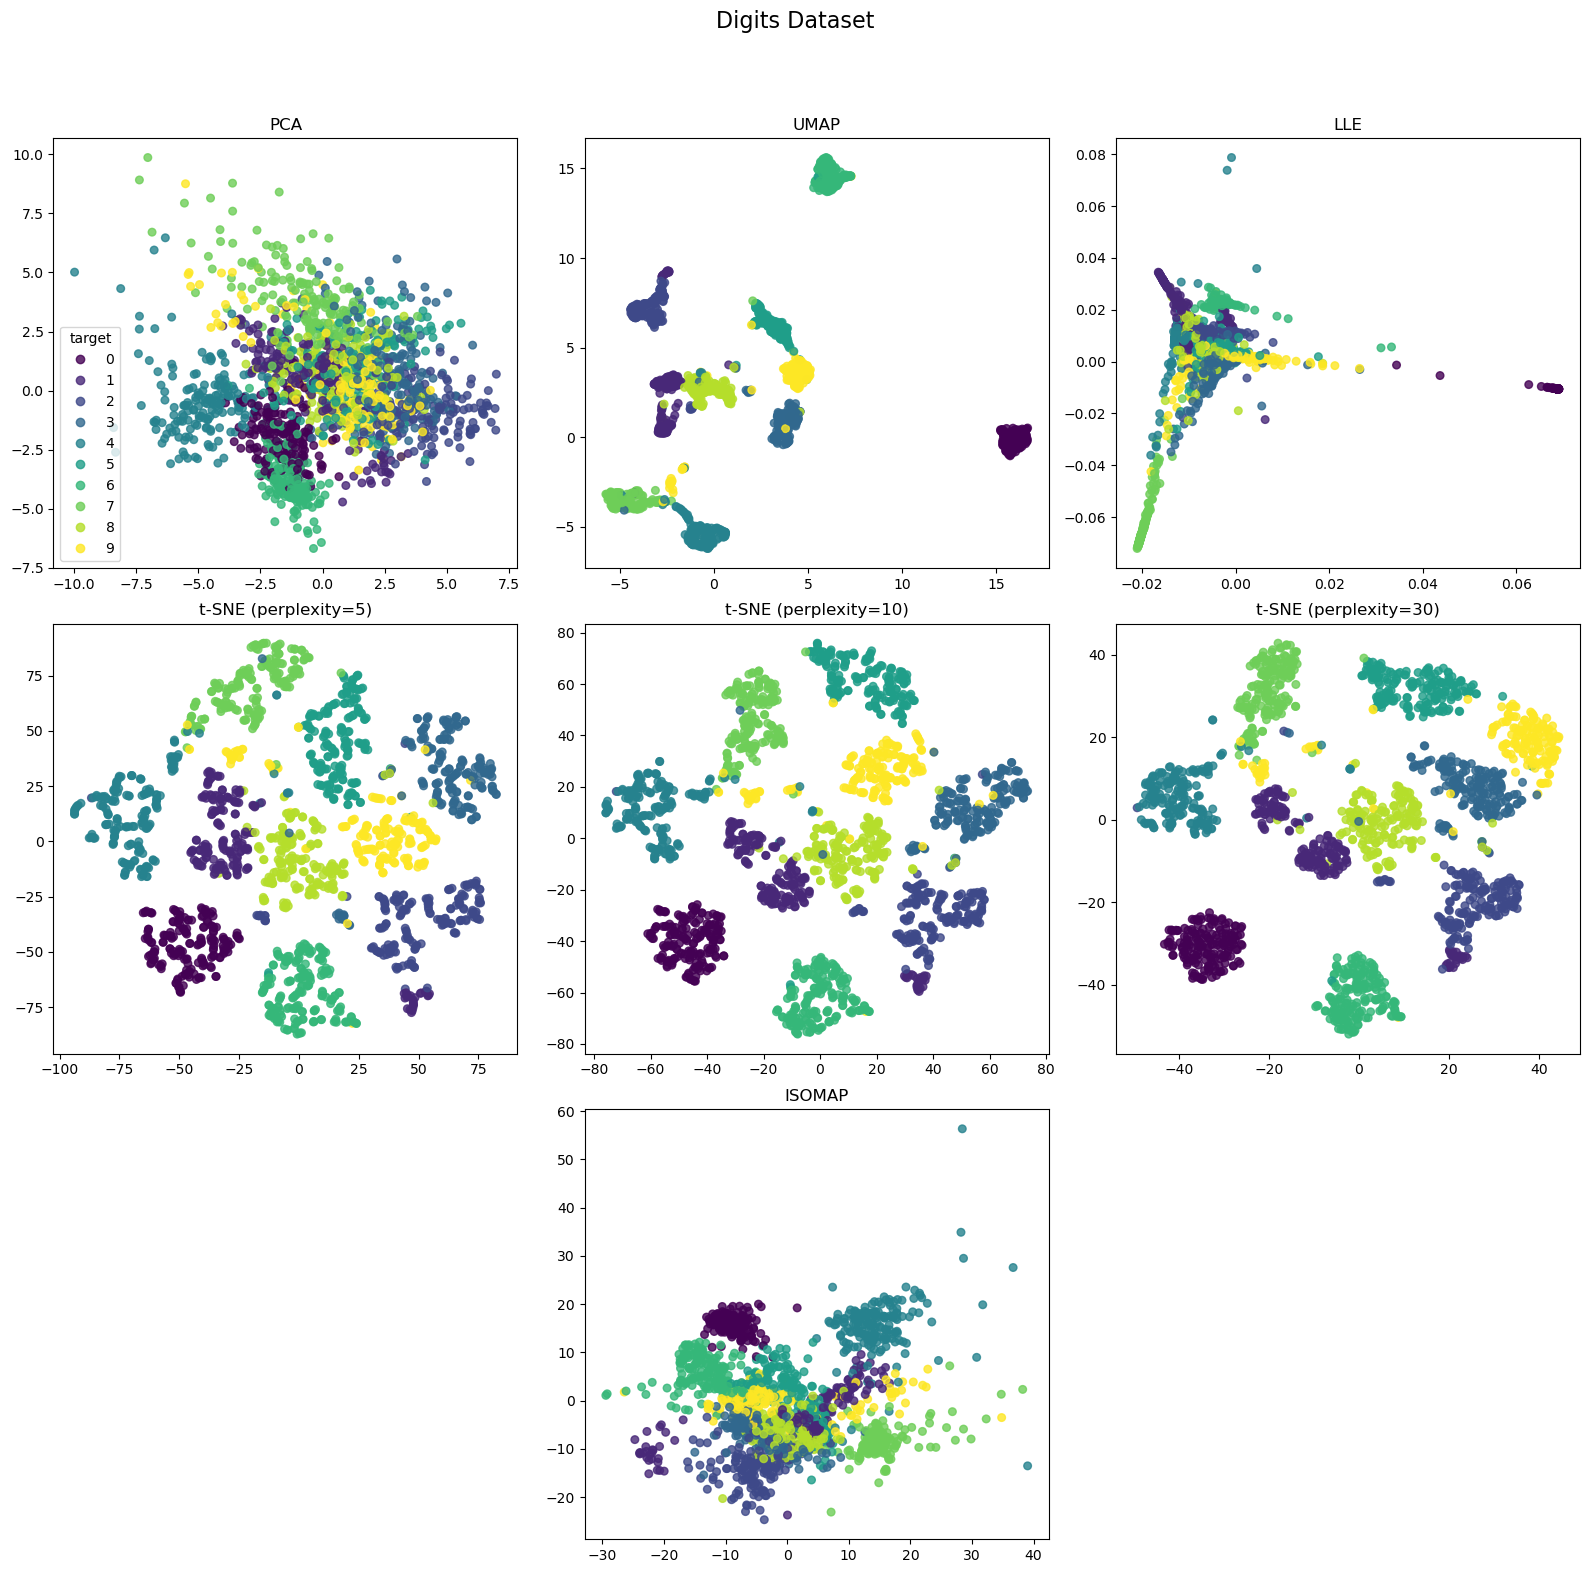

In [44]:
plot_embedding(X_digits, digits.target, 'Digits Dataset')


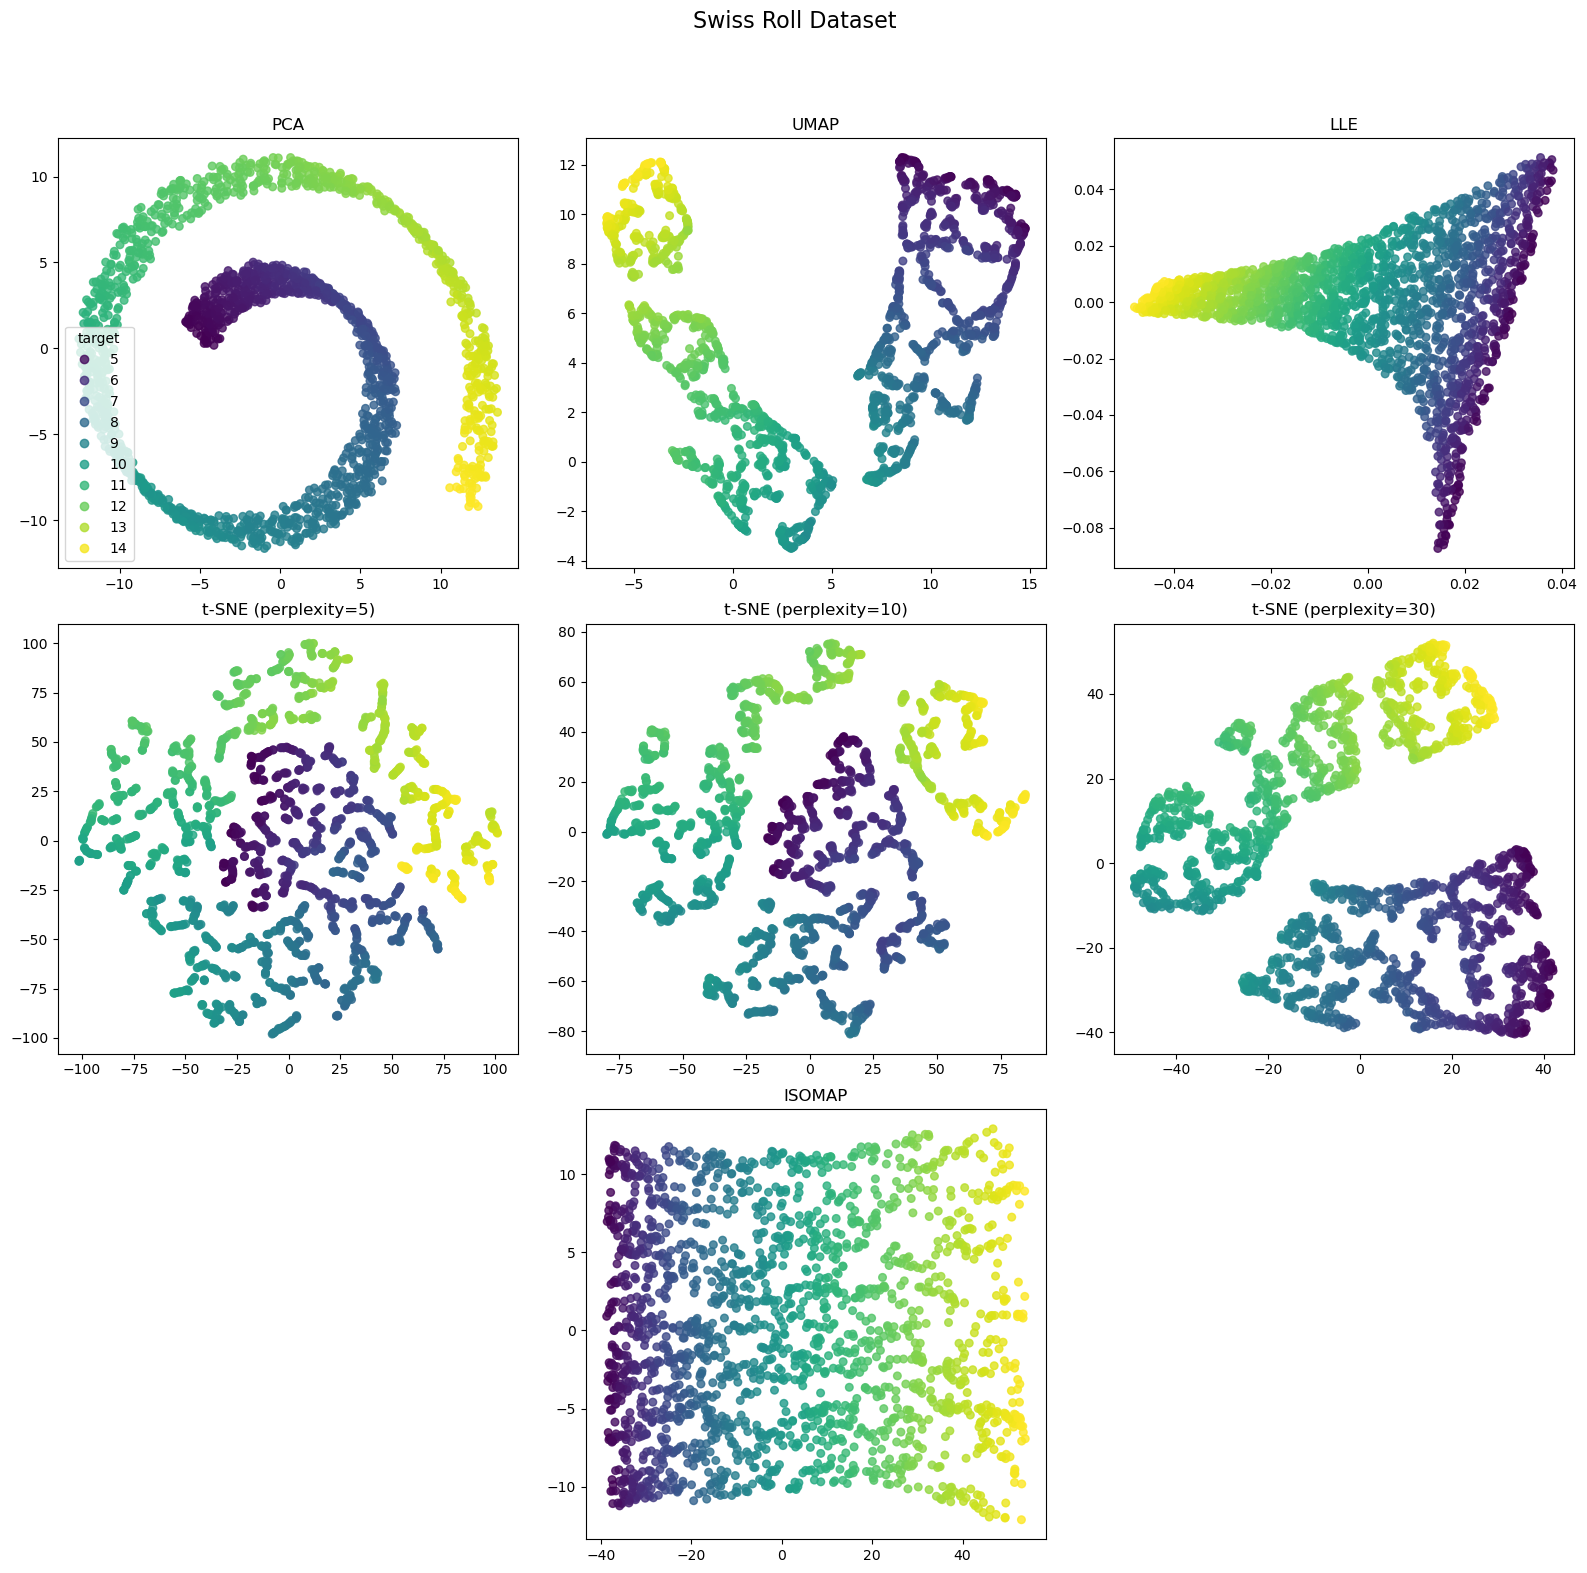

In [45]:
plot_embedding(X_swiss, t_swiss, 'Swiss Roll Dataset', n_components=2)